In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'markjoonholee'
os.environ['KAGGLE_KEY'] = ''

In [2]:
# Kaggle api를 이용하여 데이터 다운
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'

  0%|                                               | 0.00/3.97k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.97k/3.97k [00:00<00:00, 4.13MB/s]
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [3]:
import pandas as pd

In [4]:
train_data = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
train_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
# 1. data check
train_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


머신러닝 모델을 만들때

정확도 90프로야: 100개를 예측하면 90개를 맞춰

이사람이 암이 아니다라고 예측을 했어 -> 이사람이 암이 큰일 나잖아

이사람이 암이다 예측을 했어 -> 이사람이 암이면 괜찮잖아

계산하는거는 다음시간에 할게

In [7]:
train_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
train_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='Count'>

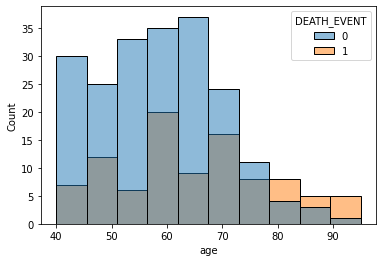

In [9]:
import seaborn as sns
sns.histplot(x='age', data=train_data, hue='DEATH_EVENT')

In [10]:
numerical = train_data[['age','creatinine_phosphokinase','ejection_fraction', 'platelets','serum_sodium', 'DEATH_EVENT']]

<AxesSubplot:>

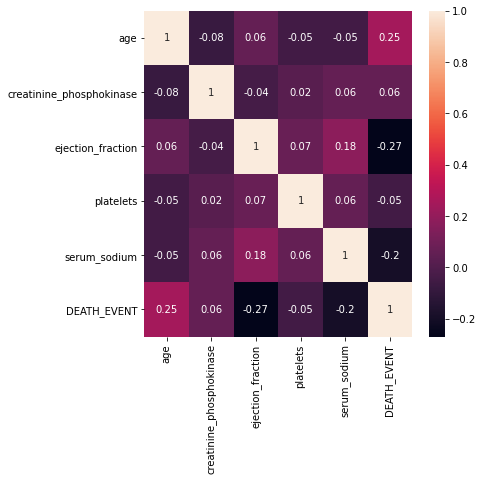

In [11]:
import matplotlib.pyplot as plt

correlation_matrix = numerical.corr().round(2)
plt.figure(figsize=(6, 6))
sns.heatmap(data=correlation_matrix, annot=True)

<AxesSubplot:xlabel='anaemia', ylabel='Count'>

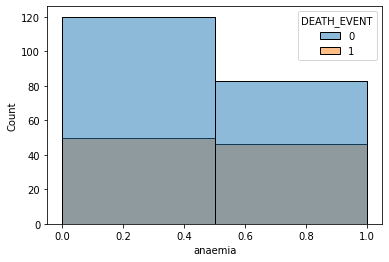

In [12]:
sns.histplot(x='anaemia', bins=2, data=train_data, hue='DEATH_EVENT') # 포함

<AxesSubplot:xlabel='diabetes', ylabel='Count'>

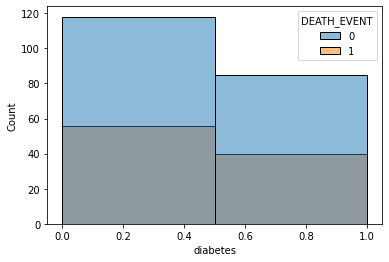

In [13]:
sns.histplot(x='diabetes', bins=2, data=train_data, hue='DEATH_EVENT') # 불포함

In [14]:
train_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='Count'>

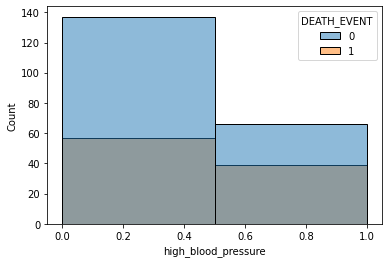

In [15]:
sns.histplot(x='high_blood_pressure', bins=2, data=train_data, hue='DEATH_EVENT') # 포함

<AxesSubplot:xlabel='platelets', ylabel='Count'>

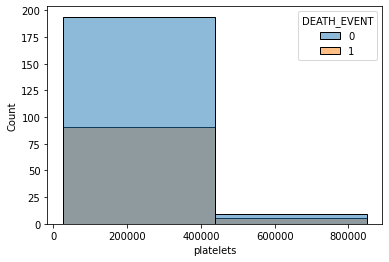

In [16]:
sns.histplot(x='platelets', bins=2, data=train_data, hue='DEATH_EVENT')

<AxesSubplot:xlabel='smoking', ylabel='Count'>

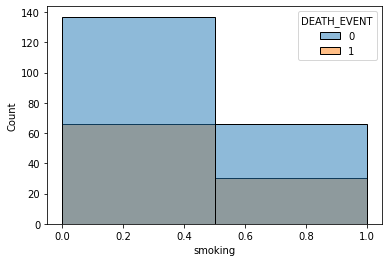

In [17]:
sns.histplot(x='smoking', bins=2, data=train_data, hue='DEATH_EVENT') # 포함


In [18]:
#'anaemia', 'smoking', 'sex', 'high_blood_pressure'

X_cat = train_data[['anaemia', 'smoking', 'sex', 'high_blood_pressure']]
X_num = train_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = train_data['DEATH_EVENT']

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns= X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
X.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,anaemia,smoking,sex,high_blood_pressure
0,1.192945,-1.530560,0.490057,-1.504036,0,0,1,1
1,-0.491279,-0.007077,-0.284552,-0.141976,0,0,1,0
2,0.350833,-1.530560,-0.090900,-1.731046,0,1,1,0
3,-0.912335,-1.530560,0.490057,0.085034,1,0,1,0
4,0.350833,-1.530560,1.264666,-4.682176,1,0,0,0


In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [22]:
# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Random Forest Accuracy: 77.33%
Cross validation score: 73.24% (+/- 3.67%)


In [23]:
from sklearn.metrics import classification_report
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.70      0.56      0.62        25

    accuracy                           0.77        75
   macro avg       0.75      0.72      0.73        75
weighted avg       0.77      0.77      0.77        75



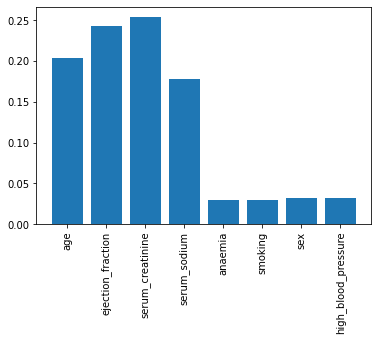

In [24]:
plt.bar(X_train.columns, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()